## Data Visualisation Principles and their implementation in Python
Super Python Talks, 17. 5. 2017.

Vilim Štih

## What makes for a good visualisation?


<img src="tuftebook.jpg" width=300px/>



In his seminal book on data visualisation, Edward Tufte proposed the requirements for excellence in visualisation:

complex ideas communicated with clarity, precision and efficiency

the greatest number of ideas in the shortest time with the least ink in the smallest space

is nearly always multivariate

requires telling the truth about the data

Deemphasizing / earsing parts of a plot not showing data
<img src="erasing.png" height=500px>



<img src="erasing2.png" height=500px>


## Let's have a look how matplotlib plots fare, and what can be improved

In [1]:
# allows for interactive plots in the browser, working well from version 2.0 onwards
%matplotlib notebook

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


Some default data

In [2]:
x = np.linspace(0.8,4.6)
ys = [f(x) for f in [np.sin, np.cos]] # list comprehension

The Matlab-like ploting interface is simple: 

<IPython.core.display.Javascript object>


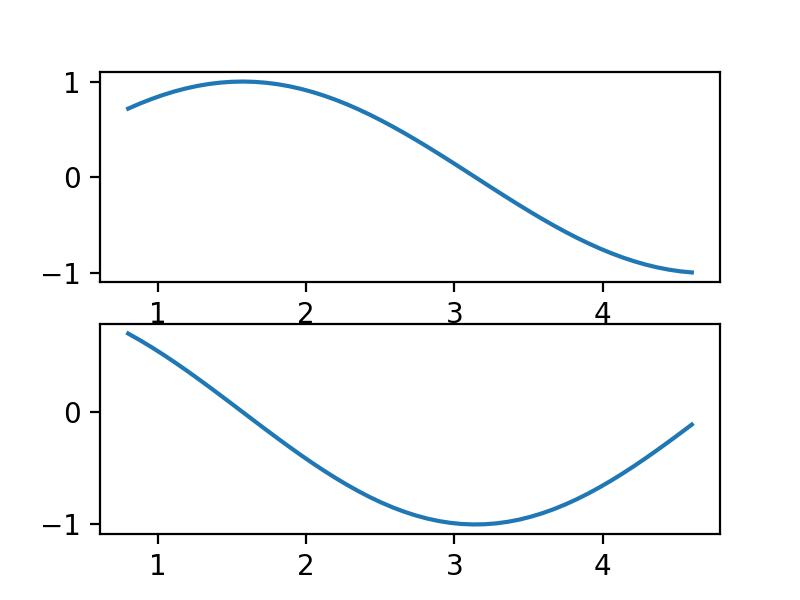

In [4]:
plt.figure(figsize=(4,3)) # necessary because of using the notebook backend %matplotlib notebook
plt.subplot(2,1,1)
plt.plot(x,ys[0])
plt.subplot(2,1,2)
plt.plot(x,ys[1])

A small introuction to the object-oriented interface

<IPython.core.display.Javascript object>


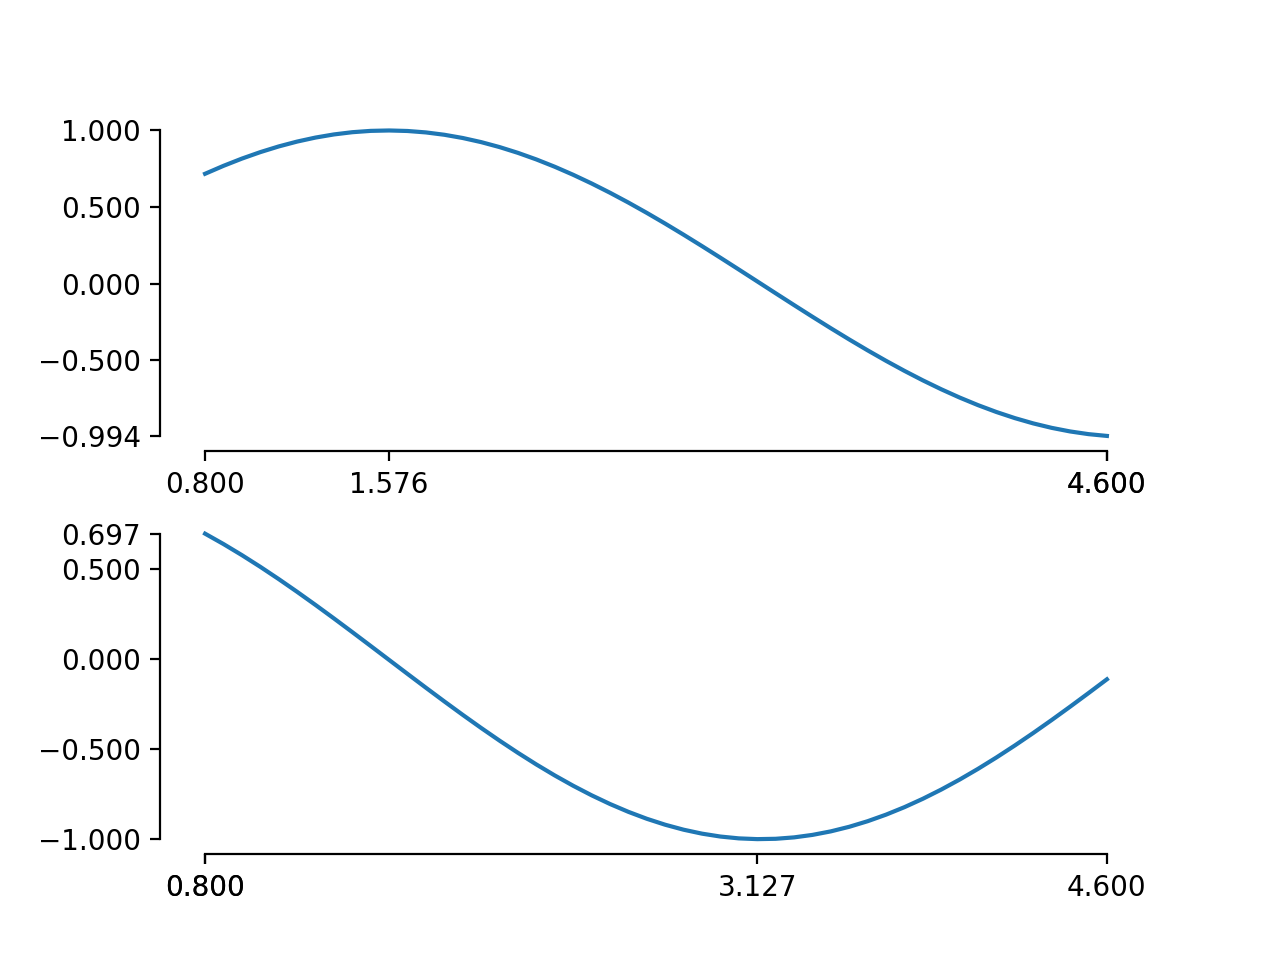

In [5]:
fig, axes = plt.subplots(2,1)
for y, ax in zip(ys, axes):
    ax.plot(x, y)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_bounds(np.min(x), np.max(x));
    ax.spines['left'].set_bounds(np.min(y), np.max(y));
    ax.set_yticks([np.min(y), -0.5, 0, 0.5, np.max(y)]);
    ax.set_xticks([np.min(x), x[np.argmax(y)], x[np.argmin(y)], np.max(x)]);

We can make custom themes, to make plots immediately insertable into manuscripts/presentations with a consistent style

In [6]:
plt.style.use('v_paper')

<IPython.core.display.Javascript object>


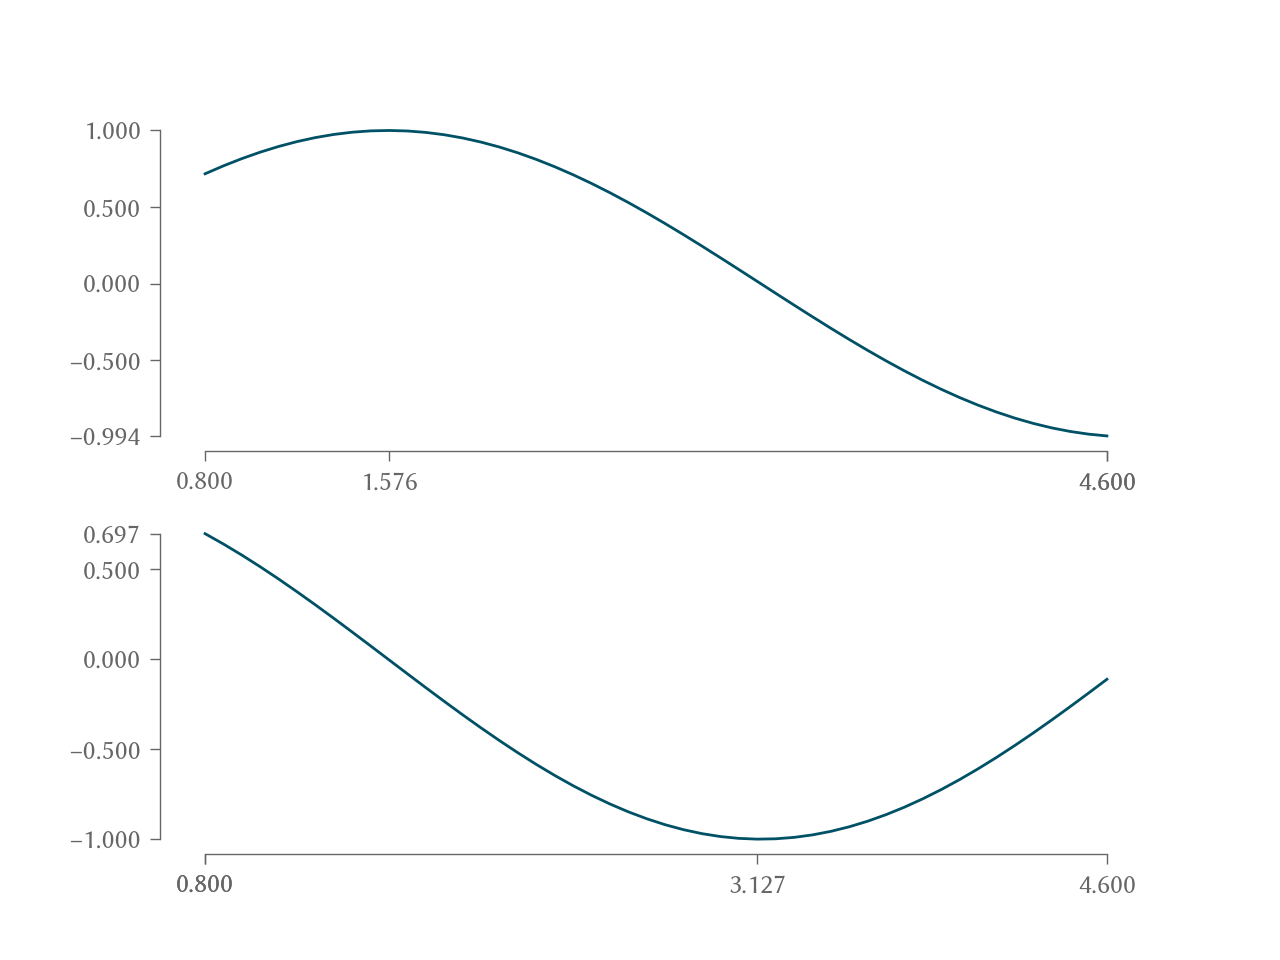

In [7]:
fig, axes = plt.subplots(2,1)
for y, ax in zip(ys, axes):
    ax.plot(x, y)
    # top and right spines are removed by the style
    ax.spines['bottom'].set_bounds(np.min(x), np.max(x));
    ax.spines['left'].set_bounds(np.min(y), np.max(y));
    ax.set_yticks([np.min(y), -0.5, 0, 0.5, np.max(y)]);
    ax.set_xticks([np.min(x), x[np.argmax(y)], x[np.argmin(y)], np.max(x)]);

The custom plots styles live in the user's home directory/.matplotlib/stylelib
For further information on how to use this, look at http://matplotlib.org/users/customizing.html

## Statistical plots

In [8]:
# library for statistical plots
import seaborn.apionly as sns

In [9]:
n_points = 50
data_0 = 10+np.random.randn(n_points)*np.sqrt(10)
# r_ is a neat numpy shortcut which allows for quick dealing with arrays as in Matlab
data_1 = np.r_[np.random.randn(n_points)-5, np.random.randn(n_points)+5] + 10
labels = np.r_[np.zeros(n_points, dtype=np.int), np.ones(n_points*2, dtype=np.int)]

In [10]:
df = pd.DataFrame(dict(data=np.r_[data_0, data_1],labels=labels))

<IPython.core.display.Javascript object>


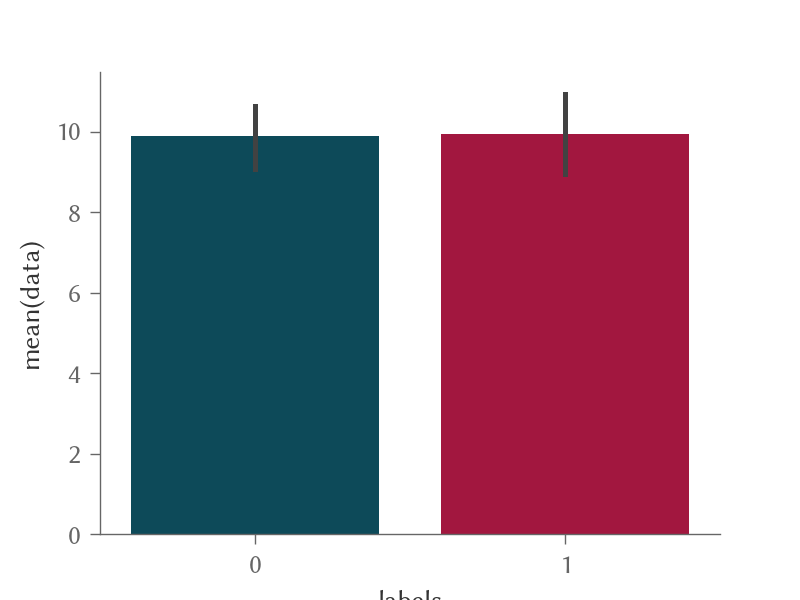

In [16]:
plt.figure(figsize=(4,3))
sns.barplot(data=df, x='labels', y='data')

<IPython.core.display.Javascript object>


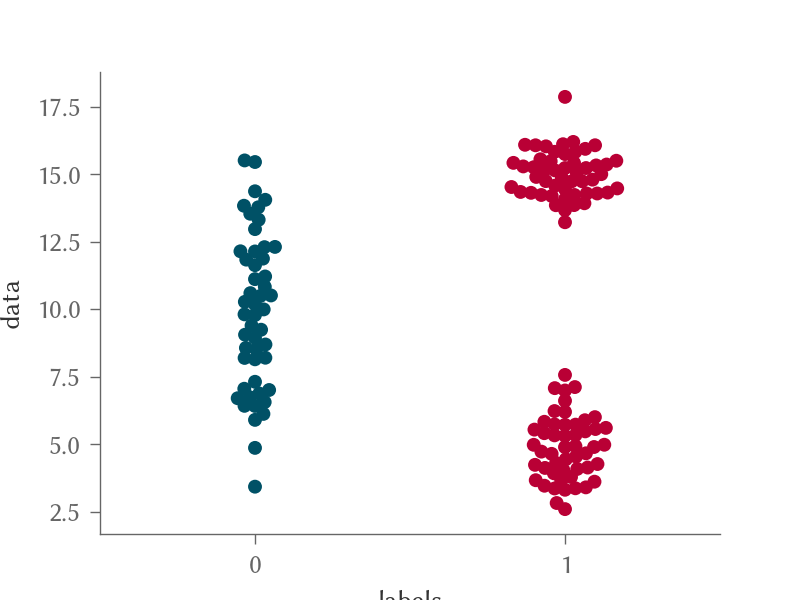

In [17]:
plt.figure(figsize=(4,3))
sns.swarmplot(data=df, x='labels', y='data')

<IPython.core.display.Javascript object>


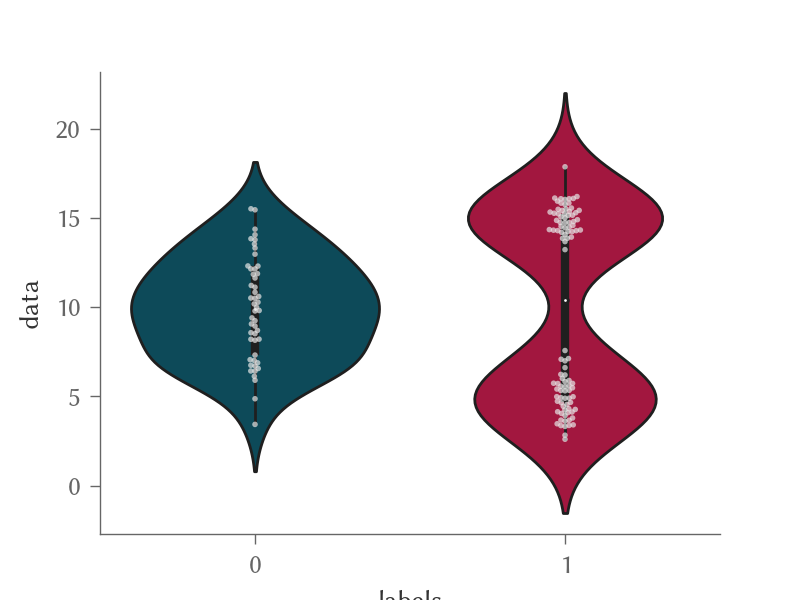

In [18]:
plt.figure(figsize=(4,3))
sns.violinplot(data=df, x='labels', y='data')
sns.swarmplot(data=df, x='labels', y='data', color=(0.9,0.9,0.9,1), alpha=0.7, size=2)